In [1]:
from functools import partial
import pickle as pkl
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import soepy

from dev_library import plot_basics_choices
from dev_library import plot_basics_wages
from dev_library import df_alignment

In [2]:
fname = "/home/peisenha/structExpectations/data-exchange-sciebo/df-observed-data-weighted-subsample.pkl"
df_obs = pd.read_pickle(fname)

In [3]:
os.chdir("/home/peisenha/structExpectations/development/estimations/estimation-current")

In [4]:
model_params_start = pd.read_pickle("start.soepy.pkl")

In [5]:
df_sim_step = soepy.simulate(model_params_start, "resources/model_spec_init.yml")
df_sim_step = df_alignment(df_sim_step)

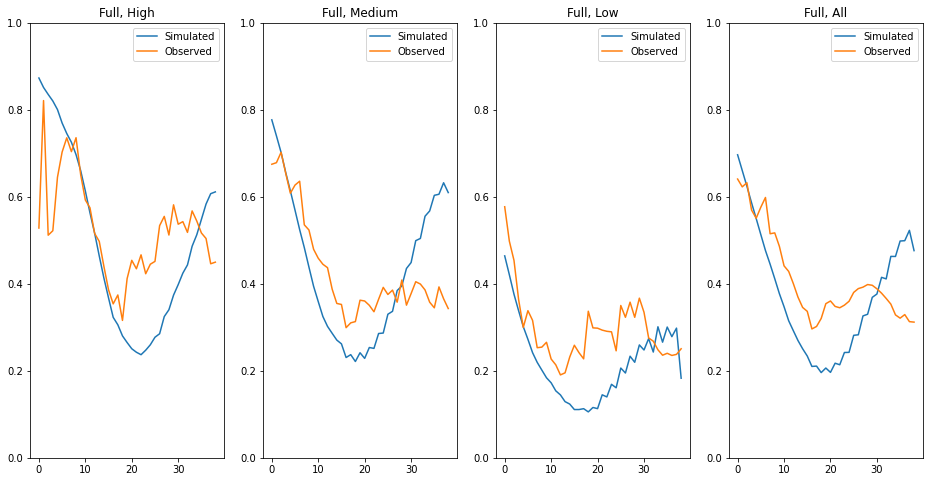

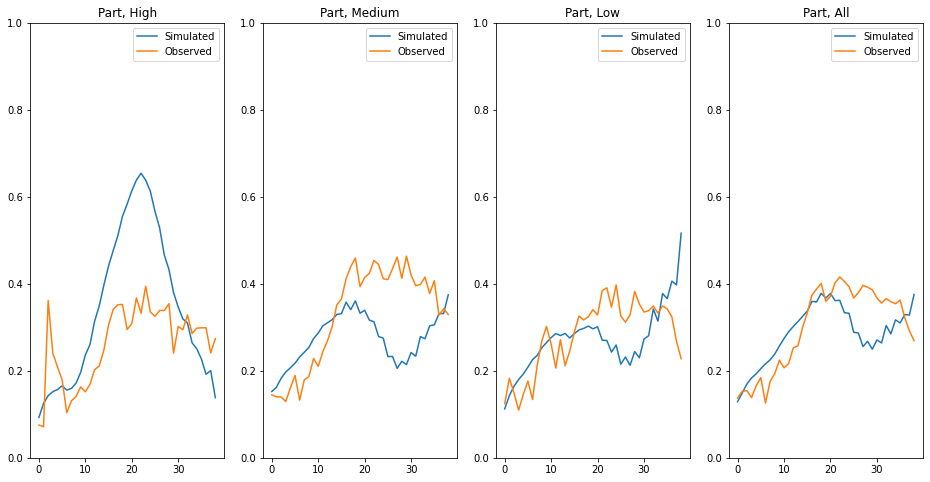

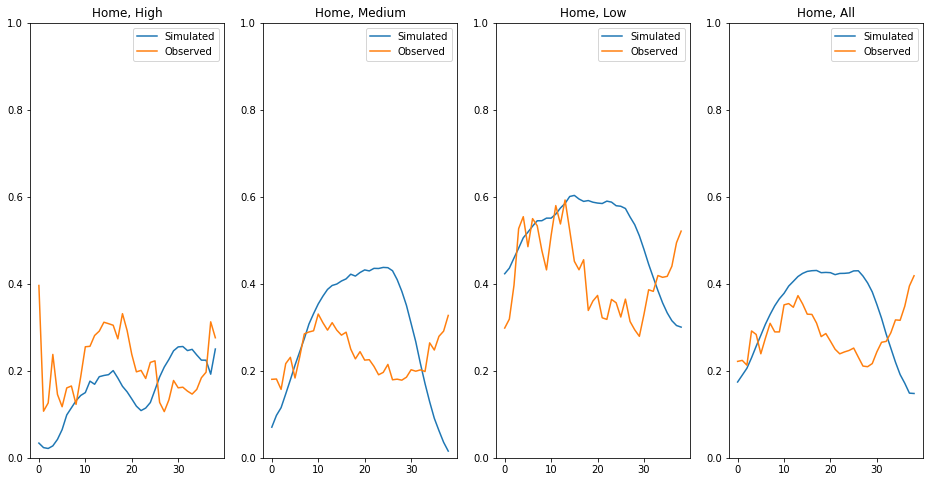

In [6]:
plot_basics_choices(df_sim=df_sim_step, df_obs=df_obs)

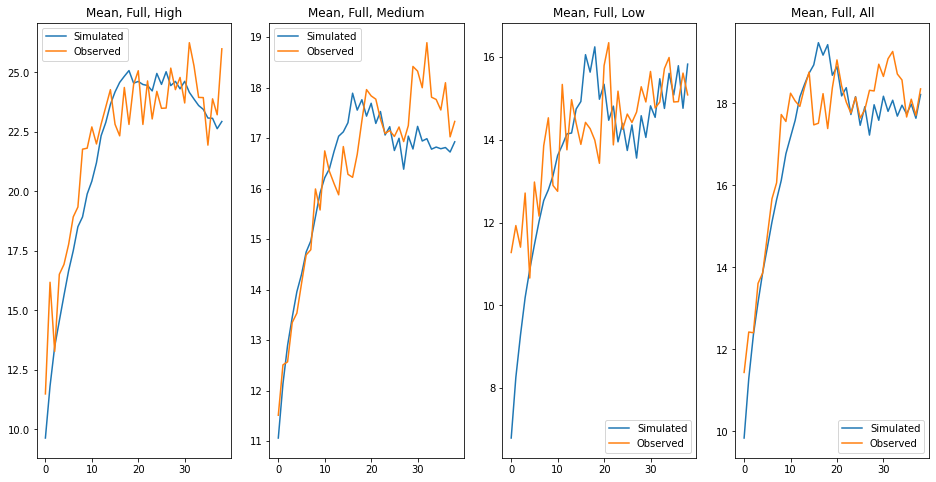

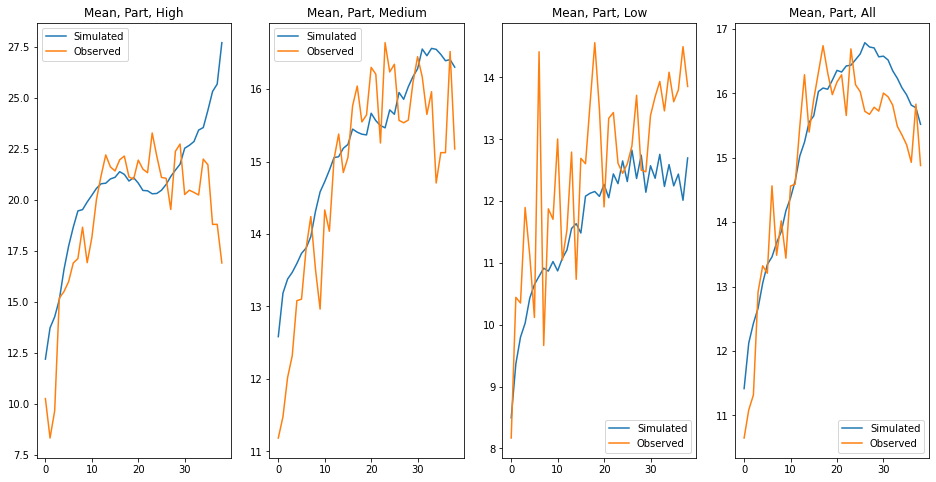

In [7]:
plot_basics_wages(df_sim=df_sim_step, df_obs=df_obs)